## Observations and Insights 

In [383]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
pymaceuticals.head()
clean_data = pymaceuticals.dropna(how="any")
clean_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [384]:
# Checking the number of mice.
mouse = pymaceuticals["Mouse ID"]
total_mice = mouse.count()
total_mice



1893

In [385]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# New Data Frame and combine groups
mouse = pymaceuticals["Mouse ID"]
mice_time = pymaceuticals.groupby(["Mouse ID", "Timepoint"], as_index=False)
mice_multiples = mouse.duplicated()



In [386]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_multiples


0       False
1       False
2       False
3       False
4       False
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Mouse ID, Length: 1893, dtype: bool

In [387]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#pymaceuticals= pymaceuticals['Mouse ID'].drop_duplicates()
#pymaceuticals = pd.

In [388]:
# Checking the number of mice in the clean DataFrame.
len(pymaceuticals['Mouse ID'].unique())



249

In [389]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use Tumor Value
tumor_stat = pymaceuticals.loc[:, ["Tumor Volume (mm3)", "Drug Regimen"]]
pymaceuticals_index= tumor_stat.set_index("Drug Regimen")
pymaceuticals_drugs = tumor_stat.groupby(["Drug Regimen"])

## Summary Statistics

In [390]:
# Unique mouse ID tumor statisics
#pymaceuticals_drugs["Drug Regimen"] = 


# This method is the most straighforward, creating multiple series and putting them all together at the end.
pymean = pymaceuticals_drugs["Tumor Volume (mm3)"].mean() #np.mean() - more math based
pymed = pymaceuticals_drugs["Tumor Volume (mm3)"].median()
pyvar = pymaceuticals_drugs["Tumor Volume (mm3)"].var()
pystd = pymaceuticals_drugs["Tumor Volume (mm3)"].std()
pysem = pymaceuticals_drugs["Tumor Volume (mm3)"].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
experiment_results = pd.DataFrame({"Mean": pymean, 
                                 "Median": pymed, 
                                 "Variance": pyvar,
                                 "STD": pystd,
                                  "SEM": pysem})

experiment_results

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [391]:
# This method produces everything in a single groupby function
pymaceuticals_drugs_agg= tumor_stat.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
pymaceuticals_drugs_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [392]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
pymaceuticals_t = pymaceuticals.loc[:, ["Mouse ID", "Drug Regimen"]]
drug_index = pymaceuticals_t["Drug Regimen"].value_counts()
drug_names = pymaceuticals_t["Drug Regimen"].unique()
pymaceuticals_tdf = pymaceuticals.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Rename for graphs
pymaceuticals_tdf.rename(index={'Drug Regimen': 'Total Mice'}, inplace= True)
pymaceuticals_tdf


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Trials')

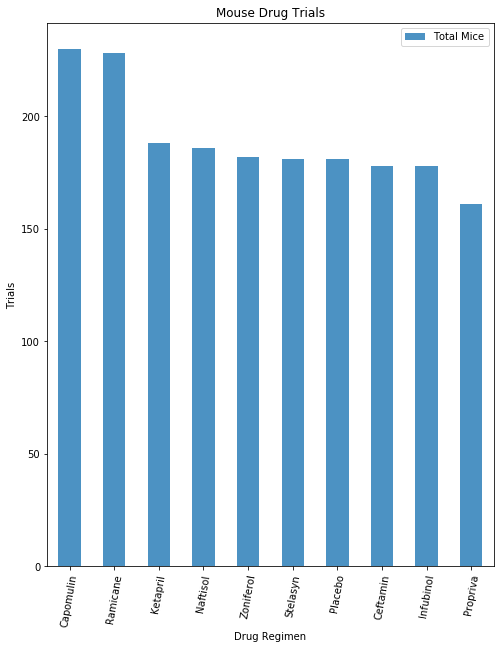

In [393]:
df = pd.DataFrame({'Drugs Tested': drug_names,
                   'Total Mice': drug_index})
# Adjust name on 360 degrees, transperancy of bar, the total plot size. 
ax = df.plot.bar(rot= 80, alpha= 0.8, figsize=(8,10))
plt.title("Mouse Drug Trials")
plt.xlabel("Drug Regimen")
plt.ylabel("Trials")

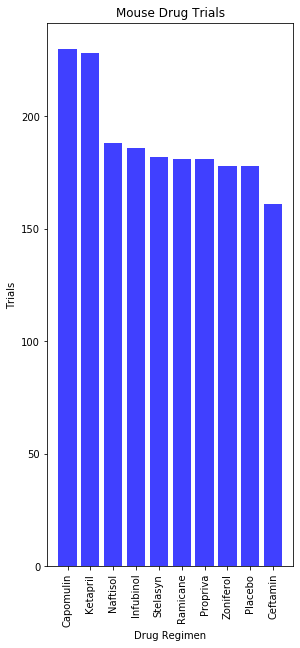

In [394]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(15, 10))
plt.subplot(131) 
plt.bar(drug_names, drug_index, color='b', alpha=0.75, align='center')
#['Ceftamin', 'Zoniferol', 'Placebo', 'Ramicane', 'Infubinol', 'Ketapril', 'Naftisol', 'Capomulin', 'Propriva', 'Stelasyn']
tick_locations = [value for value in drug_names]
plt.xticks(tick_locations, drug_names, rotation='vertical')
plt.title("Mouse Drug Trials")
plt.xlabel("Drug Regimen")
plt.ylabel("Trials")
plt.show()

In [395]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_sex = pymaceuticals.groupby(["Mouse ID","Sex"])
groupby_sex

mouse_sex_df = pd.DataFrame(groupby_sex.size())

#Create the dataframe with total count of Female and Male mice
mouse_sex = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
mouse_sex.columns = ["Mice Ratio"]
by_gender = mouse_sex["Mice Ratio"]
total_gender = mouse_sex["Mice Ratio"].sum()

#create and format the percentage of female vs male
mouse_sex["Percentage of Gender"] = (by_gender/total_gender)
mouse_sex["Percentage of Gender"] 

# format Mouse by gender
mouse_sex
percent = mouse_sex["Percentage of Gender"].map("{:.2%}".format)
mice_sex_df = pd.DataFrame({'Mice Ratio': by_gender, "Male vs Female": percent})

# Munging
mice_sex_df = mice_sex_df.round(4)
mice_sex_df

,Mice Ratio,Male vs Female
Sex,,
Female,124,49.80%
Male,125,50.20%


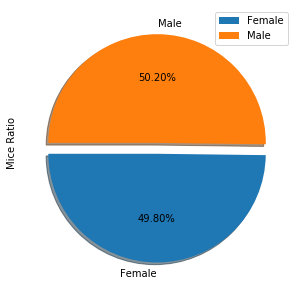

In [396]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1, 0)
plot = mouse_sex.plot.pie(y= "Mice Ratio", figsize=(5, 5), startangle=180, shadow = True, explode = explode, autopct= "%.2f%%")
# plot = mouse_sex.plot(subplots= True, kind= "pie", autopct= "%.2f%%")- why is it required to have y= "" or subplot
# looking for new solution

(-1.1059346302803437,
 1.2067664421469415,
 -1.1007415699207659,
 1.1016946163825478)

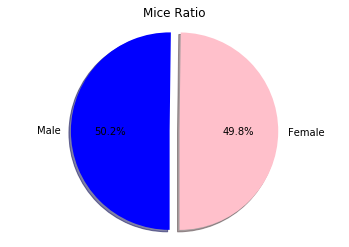

In [397]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = (by_gender/total_gender)

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("Mice Ratio")
#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [398]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 


# Start by getting the last (greatest) timepoint for each mouse :
    # - Group by mouse Id, find max of timepoint, and reset index to remove "Mouse Id" as  index.
top_r = pymaceuticals.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = top_r.merge(pymaceuticals, on= ["Mouse ID", "Timepoint"], how= "left") #join
merge_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


Sorted by Timeplots for Top 4 regemins, interesting data set:

Would like to go over this with someone! Not a solution!

# Capomulin, Ramicane, Infubinol, and Ceftamin/ This code lacked versatility and focused on top 4 Regimens.
top_regimens = pymaceuticals[pymaceuticals["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
top_regimens = top_regimens.sort_values(["Timepoint"], ascending= False)
top_regimens

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_regimens_data = top_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_regimens_data

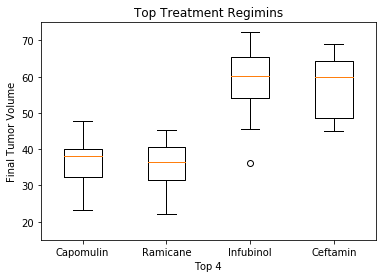

In [399]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
top_regimens_sort = merge_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
top_regimen_df = top_regimens_sort.to_frame()
top_regimen_df

# Put treatments into a list for for loop (and later for plot labels)
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create list to fill with tumor vol data (for plotting)
tumor_vol_lists = (top_regimen_df.reset_index()).groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_regimen_df = top_regimen_df.reset_index()
tumor_lists = final_regimen_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)   
    
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]    
    
# add subset 
plt.boxplot(tumor_vols, labels=top_4)    
    
# Determine outliers using upper and lower bounds
plt.ylim(15, 75)

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title("Top Treatment Regimins")
plt.xlabel("Top 4")
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

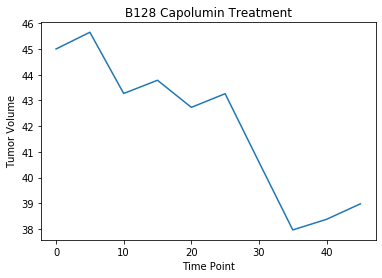

In [400]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_tumor = pymaceuticals[pymaceuticals["Mouse ID"].isin(["b128"])]
time_tumor

#time_tumor_data = time_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#time_tumor_data

#line_df = time_tumor_data.reset_index()
line_df

#line_final = line_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#line_final
plt.plot(time_tumor["Timepoint"], time_tumor["Tumor Volume (mm3)"])
#time_t.plot.line()
plt.title("B128 Capolumin Treatment")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")


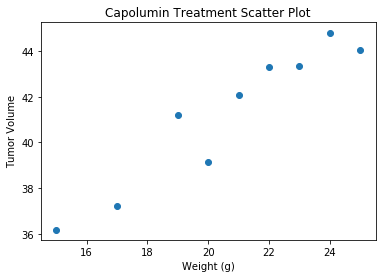

In [401]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Locate Specific Regimen
capomulin_scatter = pymaceuticals.loc[pymaceuticals["Drug Regimen"]== "Capomulin"]

# Group average weight of tumor valume then replace with plain index
capomulin_grouped_weight = capomulin_scatter.groupby(["Weight (g)"]).mean()
capomulin_grouped_weight = capomulin_grouped_weight.reset_index()
capomulin_grouped_weight

# Set up axes
plt.scatter(capomulin_grouped_weight["Weight (g)"], capomulin_grouped_weight["Tumor Volume (mm3)"] )
plt.title("Capolumin Treatment Scatter Plot")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")

plt.show()


## Correlation and Regression

<Figure size 720x720 with 0 Axes>

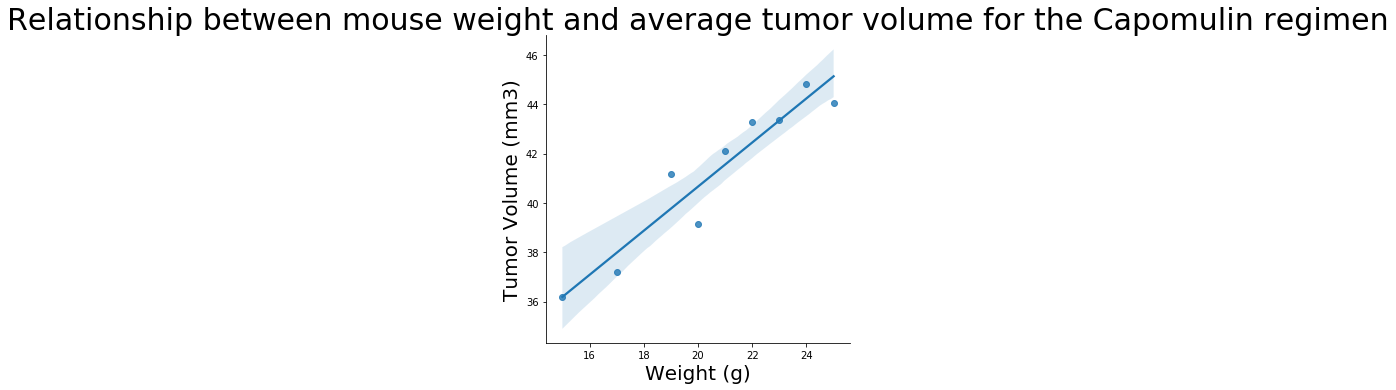

In [418]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# regression plot using seaborn
fig = plt.figure(figsize=(10, 10))
sns.lmplot(x= "Weight (g)", y="Tumor Volume (mm3)", data=capomulin_grouped_weight, fit_reg=True) 
# options: .convert_objects(convert_numeric=True)
# Legend, title and labels.
#plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between mouse weight and average tumor volume for the Capomulin regimen', size=30)
plt.xlabel('Weight (g)', size=20)
plt.ylabel('Tumor Volume (mm3)', size=20);

